<a href="https://colab.research.google.com/github/namgisung/convex-hull/blob/main/convex%20hull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

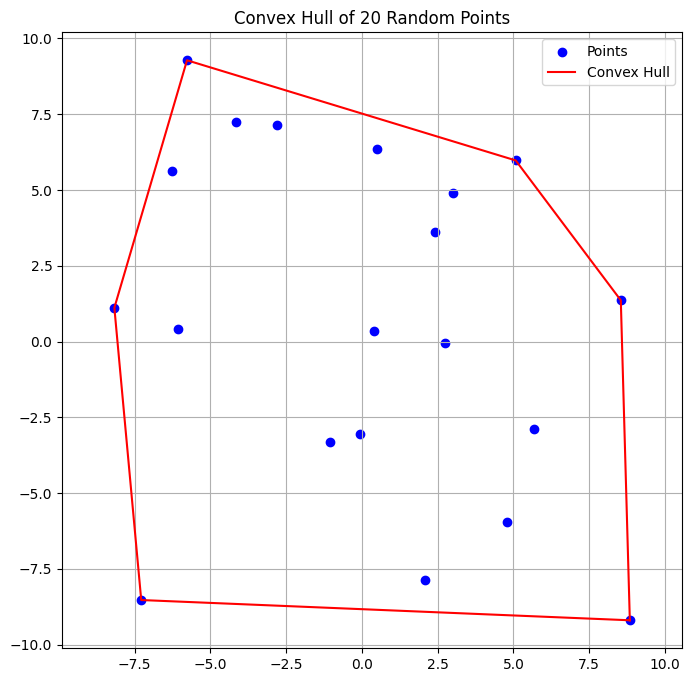

In [ ]:
# graham scan
import math
import random
import matplotlib.pyplot as plt
from typing import List

class Point:
    def __init__(self, x: float, y: float):
        self.x = x
        self.y = y

def cross(p1: Point, p2: Point, p3: Point) -> float:
    return (p2.x - p1.x) * (p3.y - p1.y) - (p2.y - p1.y) * (p3.x - p1.x)

def graham_scan(points: List[Point]) -> List[Point]:
    if len(points) <= 3:
        return points


    p0 = min(points, key=lambda p: (p.y, p.x))


    points.sort(key=lambda p: (math.atan2(p.y - p0.y, p.x - p0.x), (p.y - p0.y) ** 2 + (p.x - p0.x) ** 2))

    hull = [p0, points[1]]
    for i in range(2, len(points)):
        while len(hull) > 1 and cross(hull[-2], hull[-1], points[i]) <= 0:
            hull.pop()
        hull.append(points[i])

    return hull


num_points = 20
points = [Point(random.uniform(-10, 10), random.uniform(-10, 10)) for _ in range(num_points)]


hull = graham_scan(points)


plt.figure(figsize=(8, 8))
plt.scatter([p.x for p in points], [p.y for p in points], color='b', label='Points')
plt.plot([p.x for p in hull] + [hull[0].x], [p.y for p in hull] + [hull[0].y], color='r', label='Convex Hull')
plt.axis('equal')
plt.grid()
plt.legend()
plt.title(f'Convex Hull of {num_points} Random Points')
plt.show()


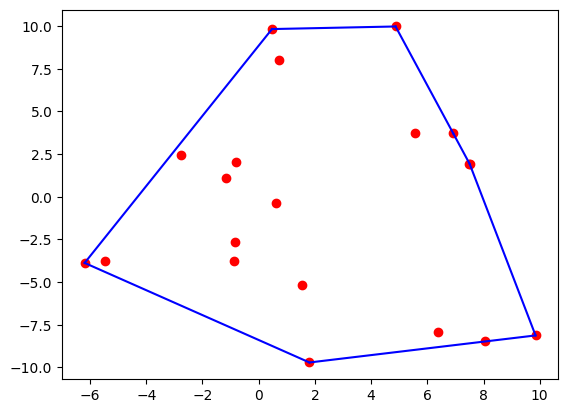

In [10]:
import random
import matplotlib.pyplot as plt

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __getitem__(self, index):
        if index == 0:
            return self.x
        elif index == 1:
            return self.y
        else:
            raise IndexError("Index must be 0 or 1")

    def __repr__(self):
        return f"Point({self.x}, {self.y})"

# Generate random points
num_points = 20
points = [Point(random.uniform(-10, 10), random.uniform(-10, 10)) for _ in range(num_points)]

def jarvis_march(points):
    def leftmost_point(points):
        min_point = points[0]
        for p in points[1:]:
            if p.x < min_point.x or (p.x == min_point.x and p.y < min_point.y):
                min_point = p
        return min_point

    def cross(o, a, b):
        return (a.x - o.x) * (b.y - o.y) - (a.y - o.y) * (b.x - o.x)

    hull = []
    start = leftmost_point(points)
    point = start

    while True:
        hull.append(point)
        next_point = points[0]
        for q in points:
            if next_point == point or cross(point, next_point, q) < 0:
                next_point = q
        point = next_point
        if point == start:
            break

    return hull

def plot_hull(points, hull):
    plt.figure()
    plt.plot([p.x for p in points], [p.y for p in points], 'ro')
    for i in range(len(hull)):
        p1 = hull[i]
        p2 = hull[(i + 1) % len(hull)]
        plt.plot([p1.x, p2.x], [p1.y, p2.y], 'b-')
    plt.show()

convex_hull = jarvis_march(points)
plot_hull(points, convex_hull)
